2000-01-01    0.204431
2000-01-02   -0.057635
2000-01-03   -0.443965
2000-01-04   -0.001423
2000-01-05   -0.604620
2000-01-06   -1.337746
2000-01-07   -1.093142
2000-01-08   -0.146066
2000-01-09   -1.080217
2000-01-10    0.035070
Freq: D, dtype: float64


<IPython.core.display.Javascript object>


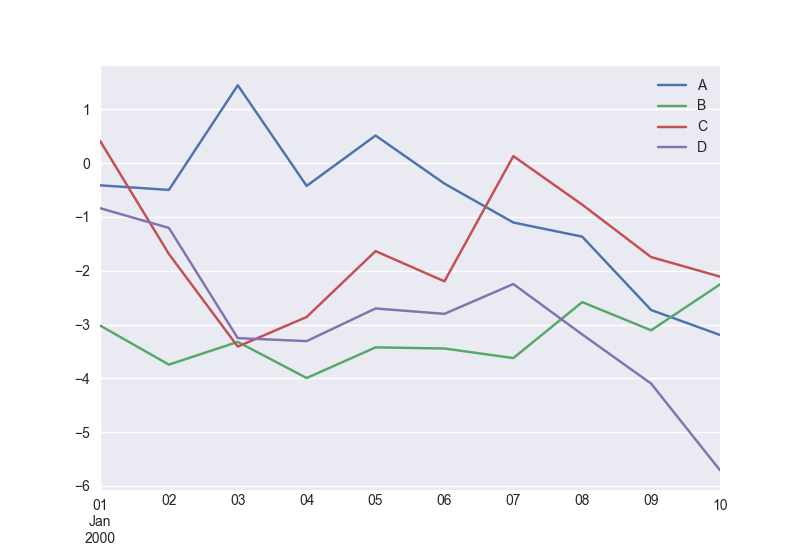

In [32]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

ts = pd.Series(np.random.randn(10), index=pd.date_range('1/1/2000', periods=10))
print(ts)
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(10, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot(); plt.legend(loc='best')

In [31]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

train  = pd.read_excel('train.xlsx')
# removing ID and Salary
X_train = train.drop(['ID', 'Salary'], axis=1)

#Keeping only numeric data
X_train = X_train._get_numeric_data()

y_train = train.Salary

print(y_train.shape)
print(X_train.shape)

clf = LinearRegression()
clf = clf.fit(X_train, y_train)

test = pd.read_excel('test.xlsx')
# removing ID and Salary
X_test = test.drop(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity'], axis=1)

#Keeping only numeric data
X_test = X_test._get_numeric_data()
y_test = test.Salary

r_sqr = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(mse)

data = pd.DataFrame({'ID':test.ID,'Salary':y_pred}).to_excel('results.xlsx',index=False)

(3998,)
(3998, 25)
102141810532.0
